![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Trabalho 2: 
Implementando um `Perceptron multi camadas` e afins para o dataset de `Documentos do diário Oficial`

<!-- <img src="image.png" width='500'> -->

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 1. Lendo nossos dados e importando bibliotecas:
<!-- <blockquote>
csv, xlsx and json data formats
</blockquote> -->

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# sp_data is a pandas dataframe of our data
sp_data = pd.read_json('/media/rafael/D/2020 RAFAEL/Faculdade/ICs/IC Direito/data/SP_PROCESSO_E_ASSUNTO_FEITOS_BCKPV2.json')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 2. Filtrando o conteúdo dos nossos dados:

<blockquote>
    <li> Contando cada contador dos nossos conteudos
    </li>
            
</blockquote>

In [2]:
count_separator = [] # this is a vector which contains the frequency of ' - ' in each Document

count_Counteudo_length = [] # this is a vector which contains the lenght of "Conteúdo" in each Document

# for each Document in data, count the frequency of ' - ' and the len of "Conteúdo"
for i, Document in enumerate(sp_data['Conteúdo']):
    count_separator.append(Document.count(' - '))

data = np.array(count_separator) # vector which contains the amount of ' - ' in each document

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<blockquote>
    <li> Separando quais documentos são sentenças e quais não são
    </li>
            
</blockquote>

In [3]:
# ------------------------------------------------------------------------------------------
# FILTER THE CONTEUDO OF NOT SENTENCES DOCUMENTS WHICH HAS 4 OR MORE ' - '
# ------------------------------------------------------------------------------------------

# regex for search of a subcontent of sentences in our data
# regex = r"( julgo | homologo.*o acordo)" # deu 97%??? deve ta errado
regex = r"(?i)(.JULGO PROCEDENTE.[^EM PARTE]|.JULGO TOTALMENTE PROCEDENTE.|.JULGO PROCEDENTE EM PARTE.|.JULGO PARCIALMENTE PROCEDENTE.|.JULGO IMPROCEDENTE.|.JULGO TOTALMENTE IMPROCEDENTE.|.JULGO EXTINTO.*sem.(julgamento|resolução).de.mérito.|.hom(o|ó)logo o acordo.|.(art\.?|artigo) 284.)"
Doc_series = pd.Series(sp_data['Conteúdo']) # Transform the pandas Data.frame to a series for initial interting spot

# Filter the documents which has the regex in "conteúdo"
sentencas = Doc_series.str.contains(regex, case=False)
sentencas = sentencas.to_numpy()

ind_range = (data > 4) & (sentencas == False)

data_4_more = sp_data['Conteúdo'][ind_range]

positions = []

processos = []

classes = []

assuntos = []

partes = []

conteudo = []

advs = []

for document in data_4_more:

    # ----------------------------------------------------------
    # Filtering the processes
    # ----------------------------------------------------------

    position = re.search(r' - ', document)
    processos.append(document[0:position.start()])

    doc_no_processos = document[position.end():]

    # ----------------------------------------------------------
    # Filtering the classes
    # ----------------------------------------------------------
    position = re.search(r' - ', doc_no_processos)
    classes.append(doc_no_processos[0:position.start()])

    doc_no_classes_to = doc_no_processos[position.end():]

    # ----------------------------------------------------------
    # Filtering the assuntos
    # ----------------------------------------------------------
    position = re.search(r' - ', doc_no_classes_to)
    assuntos.append(doc_no_classes_to[0:position.start()])

    doc_no_assuntos_to = doc_no_classes_to[position.end():]

    # ----------------------------------------------------------
    # Filtering the parts
    # ----------------------------------------------------------
    position = re.search(r' - ', doc_no_assuntos_to)
    partes.append(doc_no_assuntos_to[0:position.start()])

    doc_no_parts_to = doc_no_assuntos_to[position.end():]

    # ----------------------------------------------------------
    # Filtering the content
    # ----------------------------------------------------------

    # ----------------------------------------------------------
    # Filtering the ADV
    # ----------------------------------------------------------
    position = re.search(r"(?i)- ADV", doc_no_parts_to)
    if position:
        advs.append(doc_no_parts_to[position.start():])

        conteudo.append(doc_no_parts_to[0: position.start()])
    else:
        conteudo.append(doc_no_parts_to)

    # ----------------------------------------------------------
len(data_4_more)

/home/rafael/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


93983

In [4]:
# ------------------------------------------------------------------------------------------
# FILTER THE CONTEUDO OF SENTENCES DOCUMENTS WHICH HAS 4 OR MORE ' - '
# ------------------------------------------------------------------------------------------

C_sentencas = sp_data[sentencas]['Conteúdo']
cont_sentencas = data[sentencas]

more = cont_sentencas > 4

teste = C_sentencas[more]

processos_sentencas = []

classes_sentencas = []

assuntos_sentencas = []

partes_sentencas = []

conteudo_sentencas = []

advs_sentencas = []

for i, document in enumerate(teste):

    # ----------------------------------------------------------
    # Filtering the processes
    # ----------------------------------------------------------

    position = re.search(r' - ', document)
    if position:
        processos_sentencas.insert(i, document[0:position.start()])

        doc_no_processos = document[position.end():]

    # ----------------------------------------------------------
    # Filtering the classes
    # ----------------------------------------------------------
    position = re.search(r' - ', doc_no_processos)

    if position:
        classes_sentencas.insert(i, doc_no_processos[0:position.start()])

        doc_no_classes_to = doc_no_processos[position.end():]
    else:
        conteudo_sentencas.insert(i, doc_no_processos)
    # ----------------------------------------------------------
    # Filtering the assuntos
    # ----------------------------------------------------------
    position = re.search(r' - ', doc_no_classes_to)
    if position:
        assuntos_sentencas.insert(i, doc_no_classes_to[0:position.start()])

        doc_no_assuntos_to = doc_no_classes_to[position.end():]

    # ----------------------------------------------------------
    # Filtering the parts
    # ----------------------------------------------------------
    position = re.search(r' - ', doc_no_assuntos_to)
    if position:
        partes_sentencas.insert(i, doc_no_assuntos_to[0:position.start()])

        doc_no_parts_to = doc_no_assuntos_to[position.end():]

    # ----------------------------------------------------------
    # Filtering the content
    # ----------------------------------------------------------

    # ----------------------------------------------------------
    # Filtering the ADV
    # ----------------------------------------------------------
    position = re.search(r"(?i)- ADV", doc_no_parts_to)
    if position:
        advs_sentencas.insert(i, doc_no_parts_to[position.start():])

        conteudo_sentencas.insert(i, doc_no_parts_to[0: position.start()])
    else:
        conteudo_sentencas.insert(i, doc_no_parts_to)

len(conteudo_sentencas)

4996

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 3. Pré-Processamento:
<blockquote>
    <li> Pré-processando nossos textos, transformando o conteúdo de cada documento em uma matriz das 100 palavras mais frequentes 
    </li>
            
</blockquote>

In [5]:
# ------------------------------------------------------------------------------------------
# TOKENIZER THE "CONTEUDO" OF SENTENCES 
# ------------------------------------------------------------------------------------------

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# create the tokenizer
t = Tokenizer(num_words=100)
# fit the tokenizer on the documents
t.fit_on_texts(conteudo_sentencas)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<blockquote>
    <li> Separando os dados efetivamente e atribuindo um valor para cada classe: 1 = Sentença e 0 = Não Sentença
    </li>
            
</blockquote>

In [6]:
# ------------------------------------------------------------------------------------------
# GETTING THE TRAIN AND TEST DATASETS 
# ------------------------------------------------------------------------------------------

series = pd.Series(conteudo_sentencas)
not_sentence = pd.Series(conteudo)

X_train = pd.Series(conteudo_sentencas)
not_sentence_train = not_sentence.sample(len(X_train), random_state=123)

Y_train = [1] * len(X_train)
Y_sentence_train = [0] * len(X_train)

X_train = pd.concat([X_train, not_sentence_train])
Y_train = Y_train + Y_sentence_train

In [7]:
from sklearn.model_selection import train_test_split
sentences_train, sentences_test, y_train, y_test = train_test_split(
   X_train, Y_train, test_size=0.2, random_state=100)

X_train = t.texts_to_matrix(sentences_train, mode='count')
X_teste = t.texts_to_matrix(sentences_test, mode='count')

# X_train = t.texts_to_matrix(sentences_train, mode='freq')
# X_teste = t.texts_to_matrix(sentences_test, mode='freq')

In [8]:
print(list(t.word_index.items())[0:100])

X_train[1], list(sentences_train)[1].lower()

[('de', 1), ('a', 2), ('do', 3), ('o', 4), ('e', 5), ('da', 6), ('que', 7), ('em', 8), ('se', 9), ('não', 10), ('no', 11), ('ao', 12), ('com', 13), ('para', 14), ('por', 15), ('os', 16), ('é', 17), ('na', 18), ('dos', 19), ('à', 20), ('as', 21), ('ou', 22), ('lei', 23), ('como', 24), ('nos', 25), ('r', 26), ('art', 27), ('fls', 28), ('pelo', 29), ('valor', 30), ('ser', 31), ('pela', 32), ('das', 33), ('artigo', 34), ('ação', 35), ('nº', 36), ('i', 37), ('direito', 38), ('juros', 39), ('parte', 40), ('processo', 41), ('código', 42), ('civil', 43), ('1', 44), ('pagamento', 45), ('contrato', 46), ('sua', 47), ('autos', 48), ('autora', 49), ('autor', 50), ('foi', 51), ('são', 52), ('pedido', 53), ('termos', 54), ('caso', 55), ('um', 56), ('sobre', 57), ('c', 58), ('aos', 59), ('sem', 60), ('uma', 61), ('seu', 62), ('p', 63), ('inicial', 64), ('julgo', 65), ('bem', 66), ('forma', 67), ('recurso', 68), ('há', 69), ('assim', 70), ('mais', 71), ('justiça', 72), ('2', 73), ('ré', 74), ('10', 75

(array([0., 3., 0., 4., 3., 1., 0., 0., 2., 2., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'josé carlos de castro e outro - vistos. em face do alegado à fls.214, defiro o desentranhamento do documento de fls.13, independente de cópia. aguarde-se em cartório pelo prazo do acordo, devendo o exequente, oportunamente, informar o cumprimento para extinção do feito. intime-se. ')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<blockquote>
    <li> Definindo uma função auxiliar de "print" de uma matriz de confusão
    </li>
            
</blockquote>

In [9]:
import seaborn as sn
def confusion_matrix(X_teste,y_test):
    preds = grid.predict(X_teste)
    label_classes = ['Não_sentenças','Sentenças']
    confusion_matrix = np.zeros((len(label_classes), len(label_classes)))

    for i,prediction in enumerate(preds):

        confusion_matrix[prediction[0],y_test[i]] +=1
    df_cm = pd.DataFrame(confusion_matrix, columns=label_classes, index=label_classes)
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 24}) # font size

    plt.show()
    plt.close()
    return confusion_matrix

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 4. Treino nos dados:
<blockquote>
    <li> Definindo o primeiro modelo: Embeding + Conv1D + MLP 
    </li>
            
</blockquote>

In [46]:
import time

# ------------------------------------------------------------------------------------------
# CREATING A SIMPLE MODEL 
# ------------------------------------------------------------------------------------------
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Input, LSTM
import tensorflow as tf

def EmbeddingModel(num_filters, kernel_size, vocab_size, embedding_dim, hidden_dims):
    
    model = Sequential()

    model.add(Embedding(vocab_size +1,
                        embedding_dim,
                        input_length=vocab_size))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(num_filters,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(hidden_dims))
    model.add(Dropout(0.25))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                 )
    return model
 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<blockquote>
    <li> usando um "buscador de hyperparametros" alterando: número de neurônios e tamanho do kernel  
    </li>
            
</blockquote>

In [47]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# definindo o número de épocas e o k do cross-validation
epochs = 20
cv = 10

output_file = 'output.txt'

start_time = time.time()

# Parameter grid for grid search
param_grid = dict(num_filters=[64, 128, 256],
                  kernel_size=[3, 5, 7],
                  vocab_size=[100], 
                  embedding_dim=[64,128,256],
                  hidden_dims=[64,128,256])

model = KerasClassifier(build_fn=EmbeddingModel,
                        epochs=epochs, batch_size=16)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          scoring='roc_auc',
                          cv=cv, verbose=1)

grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_teste, y_test)

with open(output_file, 'a') as f:
    s = ('{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy)
    print(output_string)
    f.write(output_string)

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Epoch 1/20
  1/450 [..............................] - ETA: 0s - loss: 0.6992 - accuracy: 0.3750

InvalidArgumentError:  indices[1,1] = 310 is not in [0, 101)
	 [[node sequential_19/embedding_14/embedding_lookup (defined at /home/rafael/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458) ]] [Op:__inference_train_function_52595]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_19/embedding_14/embedding_lookup:
 sequential_19/embedding_14/embedding_lookup/52265 (defined at /usr/lib/python3.6/contextlib.py:81)

Function call stack:
train_function


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<blockquote>
    <li> Vendo a matriz de confusão
    </li>
            
</blockquote>

In [ ]:
cfm = confusion_matrix(X_teste,y_test)
especificidade = cfm[1][1]/ (cfm[0][1] + cfm[1][1])
sensitividade = cfm[0][0]/ (cfm[0][0] + cfm[1][0])
sensitividade, especificidade

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<blockquote>
    <li> Definindo o segundo modelo: MLP 
    </li>
            
</blockquote>

In [24]:
from tensorflow import keras

# ------------------------------------------------------------------------------------------
# CREATING A SIMPLE MODEL 
# ------------------------------------------------------------------------------------------
def MultiLayerPerceptron(hiden_dims, hiden_layers,input_size):
    
    model = Sequential()
    model.add(keras.Input(shape=(input_size,)))
    
    for i in range(hiden_layers):
        model.add(Dense(hiden_dims))
        model.add(Dropout(0.5))
        model.add(Activation('relu'))
        
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                 )
    return model
    

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<blockquote>
    <li> usando um "buscador de hyperparametros" alterando: número de neurônios e quantidade de camadas escondidas  
    </li>
            
</blockquote>

In [25]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
output_file = 'output_MLP.txt'

start_time = time.time()

# Parameter grid for grid search
param_grid = dict(hiden_dims=[64, 128, 256, 512],
                  hiden_layers=[1,2,3,4],
                  input_size=[100])

model = KerasClassifier(build_fn=MultiLayerPerceptron,
                        epochs=epochs, batch_size=16)

start_time = time.time()

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          scoring='roc_auc',
                          cv=cv, verbose=1)

grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_teste, y_test)

with open(output_file, 'a') as f:
    s = ('{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy)
    print(output_string)
    f.write(output_string)

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Epoch 1/20
450/450 [==============================] - 1s 2ms/step - loss: 0.7004 - accuracy: 0.7568
Epoch 2/20
450/450 [==============================] - 1s 1ms/step - loss: 0.3866 - accuracy: 0.8635
Epoch 3/20
450/450 [==============================] - 1s 1ms/step - loss: 0.3328 - accuracy: 0.8877
Epoch 4/20
450/450 [==============================] - 1s 1ms/step - loss: 0.2937 - accuracy: 0.8943
Epoch 5/20
450/450 [==============================] - 1s 1ms/step - loss: 0.2853 - accuracy: 0.9014
Epoch 6/20
450/450 [==============================] - 1s 1ms/step - loss: 0.2597 - accuracy: 0.9062
Epoch 7/20
450/450 [==============================] - 1s 1ms/step - loss: 0.2565 - accuracy: 0.9120
Epoch 8/20
450/450 [==============================] - 1s 1ms/step - loss: 0.2420 - accuracy: 0.9164
Epoch 9/20
450/450 [==============================] - 1s 1ms/step - loss: 0.2383 - accuracy: 0.9134
Epoch 10/20
450/450 [================

KeyboardInterrupt: 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<blockquote>
    <li> Vendo a matriz de confusão
    </li>
            
</blockquote>

In [ ]:
cfm = confusion_matrix(X_teste,y_test)
especificidade = cfm[1][1]/ (cfm[0][1] + cfm[1][1])
sensitividade = cfm[0][0]/ (cfm[0][0] + cfm[1][0])
sensitividade, especificidade

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<blockquote>
    <li> Fazendo a mesma coisa de cima, mas agr com o conteúdo NÂO FILTRADO!
    </li>
            
</blockquote>

In [ ]:
# ------------------------------------------------------------------------------------------
# GETTING THE TRAIN AND TEST DATASETS 
# ------------------------------------------------------------------------------------------

# create the tokenizer
t = Tokenizer(num_words=100)
# fit the tokenizer on the documents
t.fit_on_texts(C_sentencas)

In [ ]:
series = pd.Series(C_sentencas)
not_sentence = pd.Series(data_4_more)

X_train = pd.Series(C_sentencas)
not_sentence_train = not_sentence.sample(len(X_train), random_state=123)

Y_train = [1] * len(X_train)
Y_sentence_train = [0] * len(X_train)

X_train = pd.concat([X_train, not_sentence_train])
Y_train = Y_train + Y_sentence_train

In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
   X_train, Y_train, test_size=0.2, random_state=100)

X_train = t.texts_to_matrix(sentences_train, mode='count')
X_teste = t.texts_to_matrix(sentences_test, mode='count')

# X_train = t.texts_to_matrix(sentences_train, mode='freq')
# X_teste = t.texts_to_matrix(sentences_test, mode='freq')

In [ ]:
print(list(t.word_index.items())[0:100])

X_train[1], list(sentences_train)[1], y_train[1], 
# sp_data.loc[18791, ('Conteúdo')]

In [37]:
# Main settings
output_file = 'output_full_conteudo.txt'

start_time = time.time()

# Parameter grid for grid search
param_grid = dict(num_filters=[64, 128, 256],
                  kernel_size=[3, 5, 7],
                  vocab_size=[100], 
                  embedding_dim=[64,128,256],
                  hidden_dims=[64,128,256])

model = KerasClassifier(build_fn=EmbeddingModel,
                        epochs=epochs, batch_size=16)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          scoring='roc_auc',
                          cv=cv, verbose=1)

grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_teste, y_test)

with open(output_file, 'a') as f:
    s = ('{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy)
    print(output_string)
    f.write(output_string)

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Epoch 1/20


InvalidArgumentError:  indices[7,1] = 228 is not in [0, 100)
	 [[node sequential_11/embedding_6/embedding_lookup (defined at /home/rafael/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458) ]] [Op:__inference_train_function_46940]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_11/embedding_6/embedding_lookup:
 sequential_11/embedding_6/embedding_lookup/46610 (defined at /usr/lib/python3.6/contextlib.py:81)

Function call stack:
train_function


In [ ]:
cfm = confusion_matrix(X_teste,y_test)
especificidade = cfm[1][1]/ (cfm[0][1] + cfm[1][1])
sensitividade = cfm[0][0]/ (cfm[0][0] + cfm[1][0])
sensitividade, especificidade

In [ ]:
# Main settings
output_file = 'output_MLP_full_conteudo.txt'

start_time = time.time()

# Parameter grid for grid search
param_grid = dict(hiden_dims=[64, 128, 256, 512],
                  hiden_layers=[1,2,3, 4],
                  input_size=[100])

model = KerasClassifier(build_fn=MultiLayerPerceptron,
                        epochs=epochs, batch_size=16)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          scoring='roc_auc',
                          cv=cv, verbose=1)

grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_teste, y_test)

with open(output_file, 'a') as f:
    s = ('{:.4f}\n{}\n  : {:.4f}\n\n')
    output_string = s.format(
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy)
    print(output_string)
    f.write(output_string)

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
cfm = confusion_matrix(X_teste,y_test)
especificidade = cfm[1][1]/ (cfm[0][1] + cfm[1][1])
sensitividade = cfm[0][0]/ (cfm[0][0] + cfm[1][0])
sensitividade, especificidade

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### EXTRAS SÓ PELA DIVERSÃO

In [38]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [58]:
best_model_conteudo_full = MultiLayerPerceptron(512,1,100)
# def EmbeddingModel(num_filters, kernel_size, vocab_size, embedding_dim, hidden_dims):

#     model = Sequential()

#     model.add(Embedding(1040 +1,
#                         embedding_dim,
# #                         input_length=vocab_size
#                        ))
#     model.add(Dropout(0.5))
    
#     model.add(Conv1D(num_filters,
#                      kernel_size,
#                      padding='valid',
#                      activation='relu',
#                      strides=1))
#     model.add(GlobalMaxPooling1D())
#     model.add(Dense(hidden_dims))
#     model.add(Dropout(0.25))
#     model.add(Activation('relu'))
#     model.add(Dense(1))
#     model.add(Activation('sigmoid'))

#     model.compile(loss='binary_crossentropy',
#                   optimizer='adam',
#                   metrics=['accuracy']
#                  )
#     return model

# best_model_conteudo_full = EmbeddingModel(256,7,1000,64,64)
best_model_conteudo_full.summary()

X_total = np.concatenate((X_train,X_teste))
Y_total = np.concatenate((y_train, y_test))

history = best_model_conteudo_full.fit(X_total,Y_total,
                                       batch_size=1,
                                       epochs=150
                                      )
plot_history(history)
# len(X_total[0])
# best_model_conteudo_full.save('best_model_conteudo_full_2.h5')

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 512)               51712     
_________________________________________________________________
dropout_52 (Dropout)         (None, 512)               0         
_________________________________________________________________
activation_62 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 513       
_________________________________________________________________
activation_63 (Activation)   (None, 1)                 0         
Total params: 52,225
Trainable params: 52,225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
9992/9992 [==============================] - 9s 859us/step - loss: 0.9526 - accuracy: 0.8596
Epoch 2/15

KeyboardInterrupt: 

In [20]:
resto_dataset = sp_data.loc[~sp_data.index.isin(series.index),('Conteúdo')]
# , series

dados = t.texts_to_matrix(resto_dataset)

In [21]:
pred = best_model_conteudo_full.predict(dados)

In [22]:
resto_dataset.loc[pred > 0.5]

5012     Processo 0002467-59.2008.8.26.0296 (296.01.200...
5029     Processo 1018425-14.2016.8.26.0482 - Execução ...
5030     0004821-19.2012.8.26.0619 (619.01.2012.004821-...
5035     Processo 1011817-72.2017.8.26.0576 - Procedime...
5039     Processo 1007402-93.2014.8.26.0562 - Procedime...
                               ...                        
99940    Processo 0001387-91.2015.8.26.0368 - Procedime...
99953    Processo 0026529-52.2012.8.26.0320 (320.01.201...
99956    Processo 1019404-56.1996.8.26.0100 (processo p...
99973    Processo 1001134-35.2016.8.26.0115 - Alimentos...
99991    0057754-29.2012.8.26.0114 (114.01.2012.057754-...
Name: Conteúdo, Length: 12561, dtype: object

In [54]:
loaded_model = MultiLayerPerceptron(512,1,100)

# loaded_model.load_weights('best_model_conteudo_full_2')
loaded_model.load_weights('best_model_conteudo_full.h5')
# loaded_model.load_weights('test_model_conteudo_full.hd5')

In [15]:
resto_dataset = sp_data.loc[~sp_data.index.isin(series.index),('Conteúdo')]
# , series

dados = t.texts_to_matrix(resto_dataset)

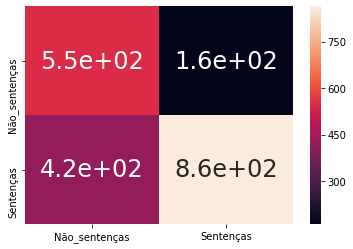

(0.5646817248459959, 0.8429268292682927)

In [16]:
# pred = loaded_model.predict(dados)
pred = loaded_model.predict(X_teste)
label_classes = ['Não_sentenças','Sentenças']
cfm = np.zeros((len(label_classes), len(label_classes)))

for i,prediction in enumerate(pred):

    cfm[int(prediction[0]),y_test[i]] +=1
df_cm = pd.DataFrame(cfm, columns=label_classes, index=label_classes)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 24}) # font size

plt.show()
plt.close()
especificidade = cfm[1][1]/ (cfm[0][1] + cfm[1][1])
sensitividade = cfm[0][0]/ (cfm[0][0] + cfm[1][0])
sensitividade, especificidade

In [ ]:
sentenças_class = resto_dataset.loc[pred > 0.5]
# with open('indices_sentencas', 'a') as f:
#     s = ('{}')
#     output_string = s.format(list(resto_dataset.loc[pred > 0.5].index))
#     print(output_string)
#     f.write(output_string)

# sp_data.iloc[resto_dataset.loc[pred > 0.5].index,:].to_json('sentenças_preditas.json')

# teste = pd.read_json('sentenças_preditas.json')
# sentenças_class.to_csv('Conteúdo_Senteças.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Teste modelo com dois neurônios na ultima camada

In [ ]:
model_teste = MultiLayerPerceptron2(512,1,100)
model_teste.summary()
new_2 = tf.keras.utils.to_categorical(
    Y_total, num_classes=2, dtype='float32'
)
history = model_teste.fit(X_total,new_2,
                                       batch_size=16,
                                       epochs=15
                                      )
# plot_history(history)
# best_model_conteudo_full.save('test_model_conteudo_full.hd5')

In [ ]:
pred = model_teste.predict(dados)

In [ ]:
sentencas_index = []
for i in range(len(pred)):
    if(np.argmax(pred[i]) == 1):
        sentencas_index.append(i)

In [59]:
# sp_data.loc[sentencas_index,('Conteúdo')]
# sp_data['Conteúdo'][2], X_train[1]

In [62]:
import tensorflow as tf
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices())

Num GPUs Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]
